In [21]:
import pandas as pd

df = pd.read_csv("salida.txt")
prom = {}
for _, row in df.iterrows():
    if not (row["Tamanio"] in prom.keys()):
        prom[int(row["Tamanio"])] = float(row["Tiempo"])
    else:
        prom[int(row["Tamanio"])] += float(row["Tiempo"])

dfProm = pd.DataFrame(
{"Tamanio" : prom.keys(),
"Tiempo" : prom.values()
}
)
dfProm["Tiempo"] = dfProm["Tiempo"] / (len(df["Tamanio"]/len(dfProm["Tamanio"])))
dfProm

,Tamanio,Tiempo
0,1,0.000023
1,2,0.000021
2,4,0.000021
3,8,0.000022
4,16,0.000022
5,32,0.000022
6,64,0.000022
7,128,0.000022
8,256,0.000022
9,512,0.000022


In [29]:
print(dfProm.to_latex(index=False))

\begin{tabular}{rr}
\toprule
Tamanio & Tiempo \\
\midrule
1 & 0.000023 \\
2 & 0.000021 \\
4 & 0.000021 \\
8 & 0.000022 \\
16 & 0.000022 \\
32 & 0.000022 \\
64 & 0.000022 \\
128 & 0.000022 \\
256 & 0.000022 \\
512 & 0.000022 \\
1024 & 0.000022 \\
2048 & 0.000022 \\
4096 & 0.000022 \\
8192 & 0.000023 \\
16384 & 0.000024 \\
32768 & 0.000027 \\
65536 & 0.000031 \\
131072 & 0.000039 \\
262144 & 0.000054 \\
524288 & 0.000082 \\
1048576 & 0.000139 \\
2097152 & 0.000255 \\
4194304 & 0.000485 \\
8388608 & 0.000950 \\
16777216 & 0.001898 \\
33554432 & 0.003735 \\
67108864 & 0.007746 \\
134217728 & 0.015871 \\
268435456 & 0.029989 \\
536870912 & 0.061041 \\
1073741824 & 0.120231 \\
\bottomrule
\end{tabular}



In [22]:
import matplotlib.pyplot as plt

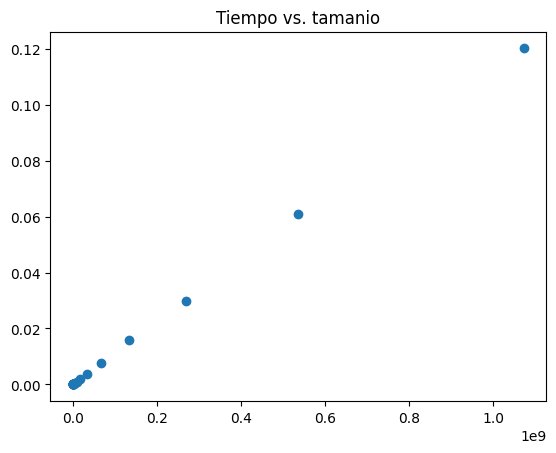

In [32]:
plt.title("Tiempo vs. tamanio")

plt.scatter(dfProm["Tamanio"], dfProm["Tiempo"])
plt.savefig("salida/scatterej1.png")
plt.show()


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

x = dfProm[["Tamanio"]]
y = dfProm["Tiempo"]

reg.fit(x, y)

LinearRegression()

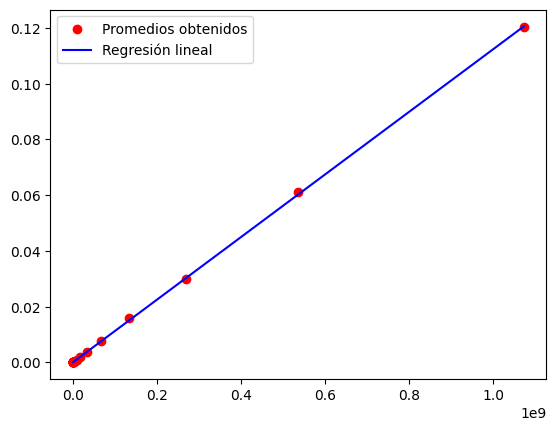

In [33]:
yPred = reg.predict(x)

plt.scatter(x, y, color="red", label="Promedios obtenidos")
plt.plot(x, yPred, color="blue", label="Regresión lineal")
plt.legend()
plt.savefig("salida/reglinej1.png")
plt.show()